In [25]:
# Time Series Prediction with LSTM
# LSTM for international airline passengers problem with regression framing
# https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
#!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [26]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return numpy.array(dataX), numpy.array(dataY)

In [27]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [28]:
# load the dataset
dataframe = read_csv('dataset/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=0)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [29]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [31]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [32]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [33]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',
    metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2,
          validation_data=(testX, testY))

score = model.evaluate(testX, testY, verbose=0)
print('Test score:', score)

Epoch 1/100
94/94 - 2s - loss: 0.0419 - val_loss: 0.2403
Epoch 2/100
94/94 - 0s - loss: 0.0203 - val_loss: 0.1671
Epoch 3/100
94/94 - 0s - loss: 0.0158 - val_loss: 0.1393
Epoch 4/100
94/94 - 0s - loss: 0.0145 - val_loss: 0.1258
Epoch 5/100
94/94 - 0s - loss: 0.0134 - val_loss: 0.1155
Epoch 6/100
94/94 - 0s - loss: 0.0124 - val_loss: 0.1047
Epoch 7/100
94/94 - 0s - loss: 0.0112 - val_loss: 0.0955
Epoch 8/100
94/94 - 0s - loss: 0.0102 - val_loss: 0.0842
Epoch 9/100
94/94 - 0s - loss: 0.0090 - val_loss: 0.0696
Epoch 10/100
94/94 - 0s - loss: 0.0078 - val_loss: 0.0564
Epoch 11/100
94/94 - 0s - loss: 0.0066 - val_loss: 0.0487
Epoch 12/100
94/94 - 0s - loss: 0.0057 - val_loss: 0.0391
Epoch 13/100
94/94 - 0s - loss: 0.0047 - val_loss: 0.0318
Epoch 14/100
94/94 - 0s - loss: 0.0040 - val_loss: 0.0263
Epoch 15/100
94/94 - 0s - loss: 0.0034 - val_loss: 0.0201
Epoch 16/100
94/94 - 0s - loss: 0.0030 - val_loss: 0.0180
Epoch 17/100
94/94 - 0s - loss: 0.0027 - val_loss: 0.0138
Epoch 18/100
94/94 - 0s

In [34]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [35]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [36]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
#print(testY[0], testPredict[:,0])
#accScore = accuracy_score(testY[0], testPredict[:,0])
#print('Test Accuracy: %.2f' % (accScore))
#y_pred = [0, 2, 1, 3]
#y_true = [0, 2, 1, 1]
#print("Accuracy Score:" ,accuracy_score(numpy.array(testY[0]), numpy.array(testPredict[:,0]))*100, "%")
#print("Accuracy Score:" ,accuracy_score(y_pred, y_true)*100, "%")

Train Score: 22.86 RMSE
Test Score: 48.26 RMSE


In [37]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [38]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

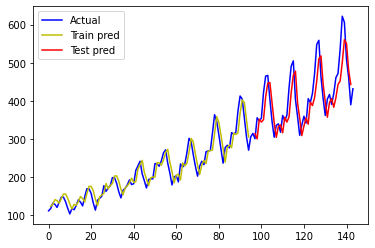

In [39]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),"b-", label="Actual")
plt.plot(trainPredictPlot,"y-", label="Train pred")
plt.plot(testPredictPlot, "r-", label="Test pred")
plt.legend(loc="best")
plt.show()